# Analysing rental data

Here I'll be analysing the rental data from trademe.

In [6]:
import re
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [113]:
rental_data = pd.read_csv("../trademe/data/wellington-flatmates.csv")

In [114]:
rental_data.head()

,location,available,furnishings,current_flatmates,ideal_flatmate,parking,in_the_area,description,title,bedrooms,rent,id_number,date,view_count
0,"Grey Lynn, Auckland City, Auckland",Sun 12 Aug,Queen bed,1 existing flatmate. 1 existing flatmate. Part...,"Someone who is respectabl­e, tidy, considerat­...",Free on-street parking available,"Parks, shops, cafés, bars, wholefoods, superar...",2 bedroom house with 1 bathroom.,"Grey Lynn, 2 bedrooms",2 bedrooms,295,Listing #:1731892840,"Listed: Sun 12 Aug, 11:01 pm",11
1,"Pakuranga, Manukau City, Auckland",Mon 13 Aug,"-large laundry room, washer/dry­er/covered out...","2 existing flatmates. Profession­al couple, we...",Enjoy a wine or beer at the weekend.,NaN,"Rotary walkway, shopping malls, train/bus stat...",5 bedroom house with 2 bathrooms.,"Pakuranga, 5 bedrooms",5 bedrooms,360,Listing #:1731670650,"Listed: Sun 12 Aug, 7:13 pm",46
2,"Glenfield, North Shore City, Auckland",Thu 16 Aug,"can be with the bed or without, two big bedsid...",3 existing flatmates. 3 family members,Female,off street,"very handy to Glenfield mall, pool, gym, and m...",3 bedroom townhouse with 2 bathrooms.,"Glenfield, 3 bedrooms",3 bedrooms,200,Listing #:1731670211,"Listed: Sun 12 Aug, 7:12 pm",40
3,"Mount Roskill, Auckland City, Auckland",Sun 12 Aug,Fully furnished,5 existing flatmates. All working Profession­a...,"European, Indian, Student, Traveler, clean and...",Off Street,"Dairy, super market, vegetable and fruit marke...",5 bedroom house with 3 bathrooms.,"Mount Roskill, 5 bedrooms",5 bedrooms,180,Listing #:1731860228,"Listed: Sun 12 Aug, 10:15 pm",46
4,"Blockhouse Bay, Auckland City, Auckland",Mon 27 Aug,"Fully furnished, but must bring your own bed a...",5 existing flatmates. Young working profession...,"Must be clean, tidy and considerate. Young Pro...",Plenty of off-street parking.,"Bus Stops, Countdown, Doctors, Beach and Ameni...",6 or more bedroom house with 3 bathrooms.,"Blockhouse Bay, 6+ bedrooms",6+ bedrooms,165,Listing #:1731773304,"Listed: Sun 12 Aug, 8:49 pm",39


In [22]:
rental_data.iloc[5,:]

Location:                           Henderson, Waitakere City, Auckland
Available:                                                   Sun 12 Aug
Furnishings:                       Room is furnished with a double bed.
Current flatmates:    3 existing flatmates. 2 owners and 1 professio...
Couples OK:                                                          No
Ideal flatmate:       Tidy, cooperativ­e, single student or professi...
Parking:                                   Off-street parking available
In the area:                                  Train station,Bu­s, shops
Description:                  6 or more bedroom house with 4 bathrooms.
title                                            Henderson, 6+ bedrooms
rent                                                      $200 per week
id_number                                          Listing #:1731537735
date                                        Listed: Sun 12 Aug, 4:16 pm
view_count                                                      

In [32]:
rental_data.title.apply(lambda s: re.search("([\d\+<>]+) bedrooms?", s).group()).value_counts()

3 bedrooms     1937
4 bedrooms     1579
5 bedrooms      740
2 bedrooms      719
6+ bedrooms     379
1 bedroom       280
Name: title, dtype: int64

In [40]:
rental_data['Location:'] = rental_data['Location:'].apply(lambda s: s.replace(", Auckland", "").strip())

In [64]:
rental_data['rent'] = rental_data.rent.apply(lambda s: int(re.search("\d+", s).group()))

Location:
Ellerslie City        AxesSubplot(0.125,0.125;0.775x0.755)
One Tree Hill City    AxesSubplot(0.125,0.125;0.775x0.755)
Onehunga City         AxesSubplot(0.125,0.125;0.775x0.755)
Name: rent, dtype: object

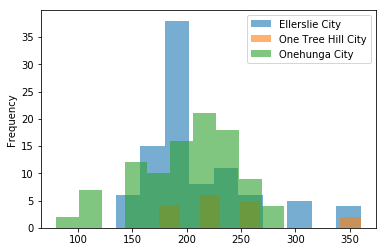

In [105]:
good_location = (rental_data['Location:']
        .apply(lambda s: s in [s + " City" for s in ['Onehunga', 'One Tree Hill', 'Ellerslie']]))

(rental_data[good_location].groupby('Location:')['rent']
     .plot(kind = 'hist', stacked = True, legend = True, alpha = 0.6)
)

In [106]:
rental_data[good_location & (rental_data.rent < 210) & (rental_data.rent > 150)].groupby("Location:").count().unstack()["Available:"]

Location:
Ellerslie City        53
One Tree Hill City     4
Onehunga City         32
dtype: int64

In [110]:
rental_data.head()

,Location:,Available:,Furnishings:,Current flatmates:,Couples OK:,Ideal flatmate:,Parking:,In the area:,Description:,title,rent,id_number,date,view_count
0,"Albany, North Shore City",Mon 10 Sep,Everything included except bedroom furniture,3 existing flatmates. One business-c­ouple and...,Negotiable,"Fun, easy-going­, reliable, profession­al.",One on site dedicated carpark,"Close to Albany village, Westfield Mall, sever...",3 bedroom townhouse with 3 bathrooms.,"Albany, 3 bedrooms",270,Listing #:1731698970,"Listed: Sun 12 Aug, 7:42 pm",57
1,"Pukekohe, Franklin",Sun 12 Aug,"Wardrobe, Single Bed, Study table.",2 existing flatmates. We are friendly people a...,Negotiable,"Female, Tidy, Full-time working.","Garage, Off-Street­.","Short drive to Pukekohe Plaza Shopping Centre,...",2 bedroom house with 1 bathroom.,"Pukekohe, 2 bedrooms",150,Listing #:1731485814,"Listed: Sun 12 Aug, 2:54 pm",40
2,St Lukes City,Mon 13 Aug,Most whiteware provided,2 existing flatmates. 2 existing female flatma...,No,NaN,Parking on road,"Mall shops, park, supermarke­t",2 bedroom house with 2 bathrooms.,"St Lukes, 2 bedrooms",220,Listing #:1731567599,"Listed: Sun 12 Aug, 5:01 pm",78
3,"Flat Bush, Manukau City",Sat 8 Sep,fully furnished,2 existing flatmates. both working full time a...,No,"good sense of human, honest reliable and pay h...",Street parking,"shopping mall .bus stop , shops petrol station...",1 bedroom house with 2 bathrooms.,"Flat Bush, 1 bedroom",180,Listing #:1731534296,"Listed: Sun 12 Aug, 4:11 pm",27
4,City Centre City,Sun 12 Aug,NaN,1 existing flatmate.,No,NaN,NaN,NaN,2 bedroom apartment with 2 bathrooms.,"City Centre, 2 bedrooms",325,Listing #:1731487095,"Listed: Sun 12 Aug, 2:56 pm",76
